### Redes Neurais Utilizando o Tensorflow

[TensorFlow™](https://www.tensorflow.org) é uma biblioteca de software livre utilizada para operações numéricas que requerem alta performance como Deep Learning. Sua estrutura simbólica de grafos (tensors) permite uma arquitetura flexível e otimizada para diferentes plataformas (e.g. CPUs, GPUs, dispositivos móveis), além de facilitar a implementação de redes em diferentes níveis de complexidade. 

Utilizando o tensorflow em Deep Learning, podemos definir o data flow da rede, compreendendo o funcionamento da mesma sem nos preocuparmos em calcular as derivadas da mesma de forma otimizada por exemplo. Isso é possível através da estrutura de tensors, em que cada operação representa um nó do grafo (e.g. adição, multiplicação) e é executada por uma seção. Além da seção, definimos placeholders e variáveis. Placeholders podem ser entendidos como as entradas e saídas da minha rede, objectos que não seráo alterados durante o treinamento. Variáveis por outro lado, podem ser tidas como pesos e bias, ou seja, objetos que são atualizados a cada interação do treinamento.       

Com essa estrutura, pode-se ter um controle do código e do que acontece na rede, podendo alterar alguns pontos chave como o algoritmo de otimização e a forma de utilizar as variáveis, sendo mais indicado o uso para aplicações e pesquisas que requerem um estudo mais aprofundado de Deep Learning. Quando o objetivo é a utilização em alto nível, uma boa opção é utilizar o Keras, framework que utiliza o tensorflow como backend em um nível de abstração mais alto.

Para maior contextualização do tensorflow puro, esse notebook irá mostrar como implementar os exercícios da Lista de Exercícios de Redes Neurais da disciplina.



In [2]:
import tensorflow as tf
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Passo 1 - Definir as entradas e saídas da rede
Para o tensorflow, as entradas e saídas da rede são definidas a partir de Placeholders. A função initPlaceholders(input_shape, output_shape) implementa essas estruturas, sendo necessário definir o tipo da variável (float 32 para esse caso) e a dimensão.
A dimensáo de entrada pode ser tida como a quantidade de instâncias contidas na base de treinamento e da quantidade necessária de entradas/saídas para processar. 

Para esse problema, tem-se 8000 instâncias, cada uma com três entradas, dessa forma, a dimensão do placeholder de entrada será [8000,3]. Da mesma forma, o placeholder de saída terá dimensãoes [8000,8], uma vez que temos 8 possíveis classes. Por fim, é boa prática também definir o nome do placeholder (X ou Y para esse exemplo) afim de identificá-lo no grafo formado pelo tensorflow.

In [31]:
X = tf.placeholder(tf.float32, shape=[None,2], name = 'X')
Y = tf.placeholder(tf.float32, shape=[None,2], name = 'Y')

### Passo 2 - Inicializar os pesos

Além de inicializar os placeholders, no tensorflow também é necessário definir as variáveis, que para redes neurais podem ser pesos e bias. Em uma rede neural, cada camada possui seus respectivos pesos e bias. Dessa forma, cada peso tem dimensão igual a quantidade de entradas da camada e da quantidade de entradas da camada seguinte. Por exemplo, a camada de entrada possui pesos de dimensão igual a [input_num, hidden_num], em que input_num é a quantidade de entradas e hidden_num a quantidade e entradas da camada seguinte. Da mesma forma, uma camada escondida possui pesos na dimensão [hidden_num, output_num], sendo hidden_num a quantidade de entradas da camada atual e output_num a quantidade de entradas da camada de saída.

Para esse problema, percebe-se que o problema é linearmente separável, o que significa dizer que pode ser resolvido apenas com perceptron. Dessa forma, a camada de entrada terá 3 neurônios e a camada de saída 8, não sendo necessário uma camada escondida.

Assim, para esse exemplo, como teremos apenas uma camada de entrada e uma de saída, teremos então um peso w com dimensoes [3,8], representando respectivamente a quantidade de entradas e saídas da rede. O bias será igual a quantidade de neurônios da camada, sendo igual a 8.

In [32]:
w1 = tf.Variable(tf.random_uniform([2,2], -1, 1), name="w1")
w2 = tf.Variable(tf.random_uniform([2,1], -1, 1), name="w2")

b1 = tf.Variable(tf.zeros([2]), name="b1")
b2 = tf.Variable(tf.zeros([1]), name="b2")

### Passo 3 - Definir a estrutura da rede

Após inicializar os pesos, pode-se definir a estrutura da rede. Isso pode-ser feito a partir da equação:

camada = função de ativação (X * W + b)

Cada camada pode ter uma função de ativação de acordo com o problema, para redes neurais tradicionais, é usual utilizar a função sigmoid, linear ou degrau. Para problemas multiclasse, podemos utilizar a função softmax.

In [33]:
hidden = tf.sigmoid(tf.add(tf.matmul(X, w1),b1)) #camada escondida
y_pred = tf.sigmoid(tf.add(tf.matmul(hidden,w2),b2)) #camada de saída

### Passo 4 - Otimização

Definida a estrutura da rede, a saída y_pred precisa ser comparada com a saída original Y da base de dados para calcular a perda (loss) do sistema. Uma forma simples de calcular a perda é calcular o erro médio quadrático (MSE), embora normalmente utilize-se a cross-entropy.

Após o cálculo da perda, pode-se corrigir o erro calculado a partir de um otimizador que possui como parâmetro uma taxa de aprendizado que pode ter o valor entre 0 e 1. Existem também outros otimizadores utilizados no [tensorflow](https://www.tensorflow.org/versions/master/api_guides/python/train), sendo o Adam bastante utilizado para Deep Learning.

In [34]:
loss = tf.reduce_mean(tf.squared_difference(y_pred, Y)) 
#loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_pred, labels=Y))
#loss = tf.nn.sigmoid_cross_entropy_with_logits(logits=y_pred, labels=Y)
#optimizer = tf.train.GradientDescentOptimizer(0.01).minimize(loss)
optimizer = tf.train.AdamOptimizer(0.1).minimize(loss)

### Passo 5 - Dataset

O dataset é uma das partes mais importantes da resolução do problema e a explicação, assim como a implementação, sobre isso está no Notebook datasets. O dataset foi salvo em Pickle e agora poderá ser manipulado uma vez que o arquivo seja aberto. 

In [35]:
fileObject = open('datasets/q3-a','rb')
dataset = pickle.load(fileObject)

#X_train, X_test, y_train, y_test = train_test_split(dataset['X'], dataset['Y'], test_size=0.2)

#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

### Passo 6 - Treinamento

Definida a rede, pode-se treinar a partir da inicialização das variáveis do tensorflow e da definiça2o da seção sess. Feito isso, a rede é treinada a partir de um número de interações que pode ser definido empiricamente e o treino é realizado com o método run, que recebe como parâmetro o otimizador calculado na etapa 5 e feed_dict. O feed_dict recebe as instâncias de entrada e de saída para cada interação.
Resumidamente, pode-se dizer que o processo de treinamento de uma rede é feito a partir dos passos:
1. Inicializar os placeholders
2. Inicializar variáveis de pesos e bias
3. Definir estrutura da rede (quantidade de camadas, função de ativação)
4. Calcular a perda (loss) a partir de uma função para calculo do erro como a MSE
5. Corrigir a perda calculada na etapa 4 a partir do gradiente
6. Definir conjunto de treinamento
7. Treinamento

In [41]:
train_losses = []
init = tf.global_variables_initializer()
sess = tf.Session()

writer = tf.summary.FileWriter("./logs", sess.graph) #tensorboard

sess.run(init)

for epoch in range(80):
    sess.run(optimizer, feed_dict={X: dataset['X'], Y: dataset['Y']})
    train_loss = sess.run(loss, feed_dict={X: dataset['X'], Y: dataset['Y']})
    train_losses.append(train_loss)

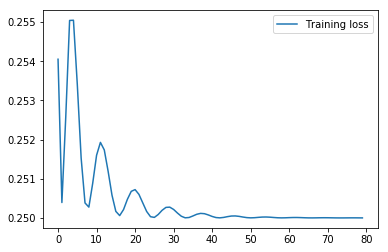

In [42]:
plt.plot(train_losses, label='Training loss')
plt.legend()
_ = plt.ylim()